## Restaurant Sales Analysis Using Python

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA LOADING

In [2]:
df=pd.read_csv("Restaurant Sales-Data.csv")

DATA OVERVIEW 

In [4]:
# check first 2 rows from the dataset.
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid


In [5]:
# check last 2 rows from the dataset.
df.tail(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin
253,10713,29-12-2022,Beverages,2.95,677.97,Drive-thru,Gift Card,Walter Muller,Berlin


In [6]:
# check statistical summarizing.
df.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [7]:
# check how many columns and rows and wich datatype of column are present and check null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [8]:
# it display the columns name from the dataset
df.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

In [10]:
print("rows count:",df.shape[0])
print("columns count:",df.shape[1])

rows count: 254
columns count: 9


DATA CLEANING 

In [11]:
# checking null values.
df.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

In [12]:
# check datatype.
df.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [15]:
# here we can see date column datatype is object we convert into datetimes datatype
df['Date']=df['Date'].astype('datetime64[ns]')

In [16]:
df.dtypes

Order ID                   int64
Date              datetime64[ns]
Product                   object
Price                    float64
Quantity                 float64
Purchase Type             object
Payment Method            object
Manager                   object
City                      object
dtype: object

In [18]:
df.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid


## Exploary Data Analyasis.

In [26]:
# 1.what is the total Sales.
df["Total_sales"]=df["Price"]*df["Quantity"]

In [35]:
print("TOTAL SALES:",round(df['Total_sales'].sum(),2))

TOTAL SALES: 769515.86


In [37]:
# 2.what is total quantity sold.
print("TOTAL QUANTITY SOLD:",round(df["Quantity"].sum(),2))

TOTAL QUANTITY SOLD: 116995.31


In [43]:
# --3.what is total Oroders.
print("TOTAL ORDERS:",df["Order ID"].count())

TOTAL ORDERS: 254


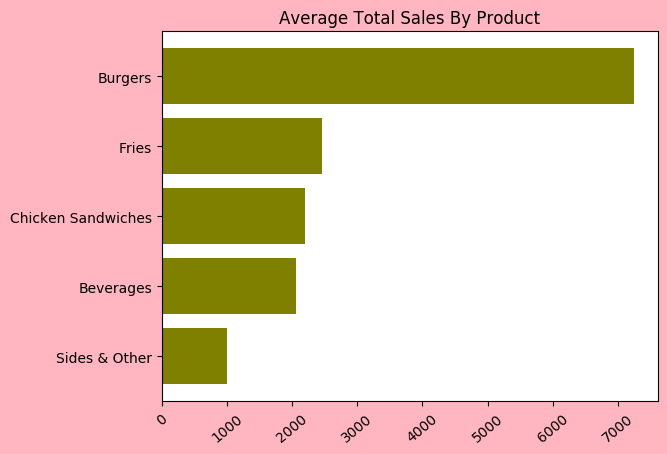

In [125]:
# --4.what is average total sales by each product.
avg_sal=round(df.groupby("Product")["Total_sales"].mean(),2).sort_values()
plt.figure(facecolor="lightpink")
plt.barh(avg_sal.index,avg_sal.values,color='olive')
plt.xticks(rotation=40)
plt.title("Average Total Sales By Product")
plt.show()

most preffered product is Burgers

<Figure size 1000x500 with 0 Axes>

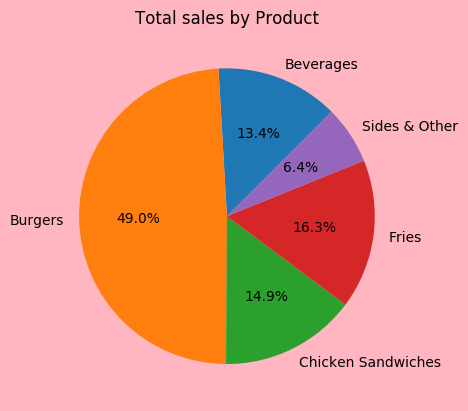

In [124]:
# --5.what is total sales by each product.
p_sale=df.groupby("Product")["Total_sales"].sum()
plt.figure(figsize=(10,5))
plt.figure(facecolor="lightpink")
plt.pie(p_sale,labels=p_sale.index,autopct="%1.1f%%",startangle=45)
plt.title("Total sales by Product")
plt.show()

most selling Product is Burgers their selling percentage is 49.0%

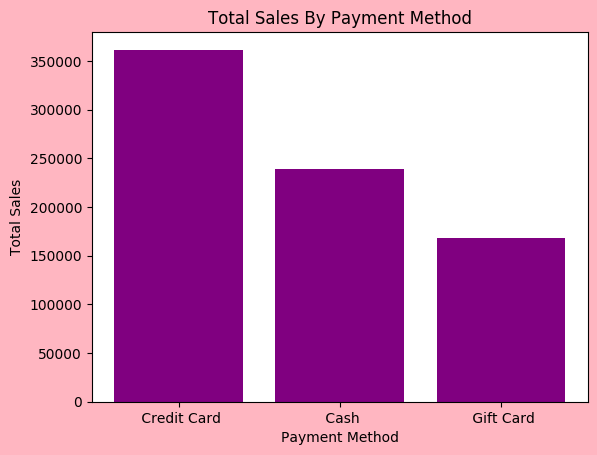

In [121]:
# --6.what is total sales by each payment methode.
pay_m=df.groupby("Payment Method")["Total_sales"].sum().sort_values(ascending=False)
plt.figure(facecolor="lightpink")
plt.bar(pay_m.index,pay_m.values,color="purple")
plt.title("Total Sales By Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

 most Total sales are comes from the 'Credit Card'

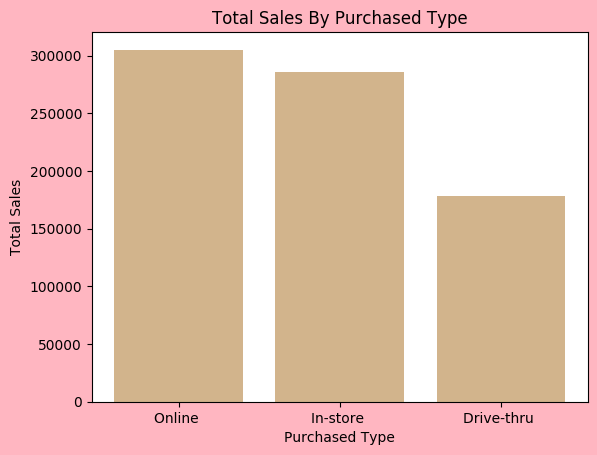

In [120]:
# --7.what is total sales by each purchase_type
p_t=df.groupby("Purchase Type")["Total_sales"].sum().sort_values(ascending=False)
plt.figure(facecolor="lightpink")
plt.bar(p_t.index,p_t.values,color="tan")
plt.title("Total Sales By Purchased Type")
plt.xlabel("Purchased Type")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
 Most of the peoples are Purchased  "Online"

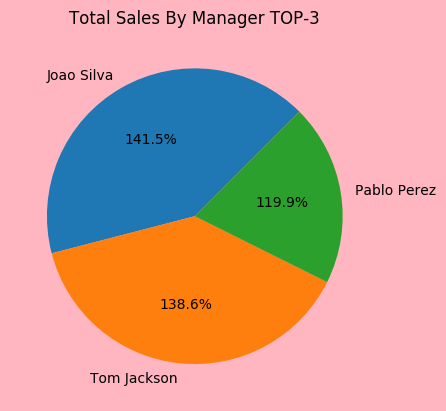

In [119]:
# --8.what is total sales top3 by each manager.
man_s=df.groupby('Manager')['Total_sales'].sum().sort_values(ascending=False).head(3)
plt.figure(facecolor='lightpink')
plt.pie(man_s,labels=man_s.index,autopct='1%.1f%%',startangle=45) 
plt.title('Total Sales By Manager TOP-3')
plt.show()

 Sales highest Manager name is "Joa silva"

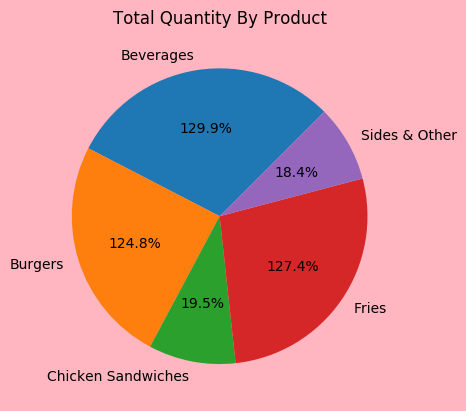

In [126]:
# --9.what is total quantity by each product.
p_q=df.groupby("Product")["Quantity"].sum()
plt.figure(facecolor='lightpink')
plt.pie(p_q,labels=p_q.index,autopct="1%.1f%%",startangle=45)
plt.title("Total Quantity By Product")
plt.show()

most Quantity is "Beverages" product

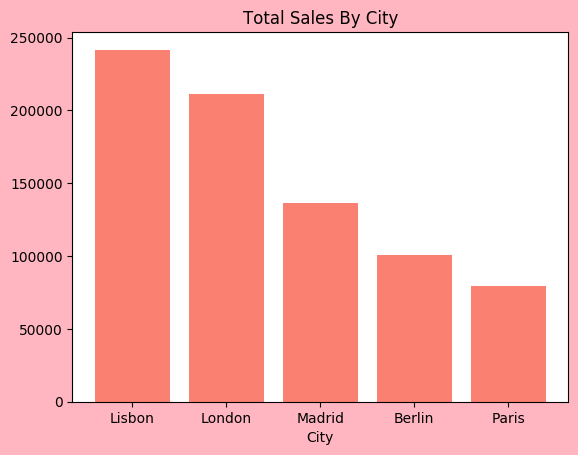

In [131]:
# --10.what is the total sales by city.
ts_city=df.groupby("City")["Total_sales"].sum().sort_values(ascending=False)
plt.figure(facecolor="lightpink")
plt.bar(ts_city.index,ts_city.values,color="salmon")
plt.title("Total Sales By City")
plt.xlabel("City")
plt.show()

"Lisbon" City produced are Most Sales 

🧾 Python Analysis — Conclusion

The Python analysis successfully addressed all key business requirements, including total sales, quantity sold, order count, product performance, payment method analysis, purchase type trends, manager-wise sales performance, and city-wise product sales distribution.

By leveraging Python for data aggregation and business logic implementation, this analysis provided deeper insight into revenue patterns, customer behavior, and operational efficiency.
The results from Python validation also ensured consistency with SQL analysis and Power BI visualization, creating a reliable end-to-end analytics solution.

This multi-tool approach demonstrates strong problem-solving ability and practical understanding of real-world data analytics workflows.